<h1>UCL Wins by Country (Pictogram)</h1>
<h4>Author: Chang Dakota Sum Kiu</h4>
<h4>Last Modified: 07/12/2021</h4>


---


This notebook contains the code used to create a waffle chart of UCL wins by country. Data taken from [Kaggle](https://www.kaggle.com/johnharshith/uefa-champions-league-quarter-finals-since-1980).

Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle

Converting the data to a pandas table

In [2]:
ucl = pd.read_csv("/Users/dcoder/Desktop/school/csc630/UCLQuarterFinals.csv")
ucl.sample(8)

,year,code,name,round,league,region,decade,superliga,city,areacode,metropol,pop,gdp,country,eurostat,ecb,cowc,cown
78,1990,SOF,CSKA Sofia,QF,Bulgaria,East,1990s,No,Sofia,BG001,NaN,NaN,NaN,Bulgaria,BG,BG,BUL,355.0
115,1995,PSG,Paris SG,SF,France,Big 5,1990s,No,Paris,FR001,Paris,12914803.0,913737.0,France,FR,FR,FRN,220.0
293,2017,BMN,FC Bayern,QF,Germany,Big 5,2010s,No,München,DE003,Munich,2883373.0,241407.0,Germany,DE,DE,GMY,255.0
180,2003,FCB,FC Barcelona,QF,Spain,Big 5,2000s,Yes,Barcelona,ES002,Barcelona,4985549.0,218318.0,Spain,ES,ES,SPN,230.0
164,2001,MNU,Manchester Utd FC,QF,England,Big 5,2000s,Yes,Manchester,UK008,Manchester,3348274.0,136317.0,United Kingdom,UK,GB,UKG,200.0
264,2014,RMA,Real Madrid CF,W,Spain,Big 5,2010s,Yes,Madrid,ES001,Madrid,6791667.0,342534.0,Spain,ES,ES,SPN,230.0
89,1992,SAM,UC Sampdoria,RU,Italy,Big 5,1990s,No,Genova,IT006,Genoa,705175.0,32391.0,Italy,IT,IT,ITA,325.0
202,2006,VIL,Villareal CF,SF,Spain,Big 5,2000s,No,Vilareal,Vilareal,NaN,NaN,NaN,Spain,ES,ES,SPN,230.0


Dropping repetitive columns and loosing teams

In [3]:
ucl_wins = ucl[ucl['round']=='W']
ucl_wins.drop(labels=['round', 'metropol', 'pop', 'gdp', 'eurostat', 'ecb', 'cowc', 'cown'], axis=1, inplace=True)
ucl_wins.sample(8)

/Users/dcoder/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,year,code,name,league,region,decade,superliga,city,areacode,country
88,1992,BAR,FC Barcelona,Spain,Big 5,1990s,Yes,Barcelona,ES002,Spain
272,2015,FCB,FC Barcelona,Spain,Big 5,2010s,Yes,Barcelona,ES002,Spain
8,1982,AST,Aston Villa FC,England,Big 5,1980s,No,Birmingham,UK002,United Kingdom
120,1996,AJA,AFC Ajax,Netherlands,Small,1990s,No,Amsterdam,NL002,Netherlands
176,2003,JUV,Juventus FC,Italy,Big 5,2000s,Yes,Torino,IT004,Italy
72,1990,MIL,AC Milan,Italy,Big 5,1990s,Yes,Milano,IT002,Italy
224,2009,FCB,FC Barcelona,Spain,Big 5,2010s,Yes,Barcelona,ES002,Spain
24,1984,LIV,Liverpool FC,England,Big 5,1980s,Yes,Liverpool,UK006,United Kingdom


Getting the countries of each winning team

In [4]:
countries = ucl_wins['country'].unique()
countries

array(['United Kingdom', 'Germany', 'Italy', 'Romania', 'Portugal',
       'Netherlands', nan, 'Spain', 'France'], dtype=object)

Count of how many times each country won

In [5]:
corresponding_wins = []
for country in countries:
  corresponding_wins.append(ucl_wins[ucl_wins['country']==country].count()[0])
print(corresponding_wins)

[8, 6, 8, 1, 2, 3, 0, 11, 1]


Creation of a dataframe based on lists made above

In [6]:

data ={'countries': countries,
       'wins': corresponding_wins
     }
  
df = pd.DataFrame(data)

Creating a waffle chart using pywaffle

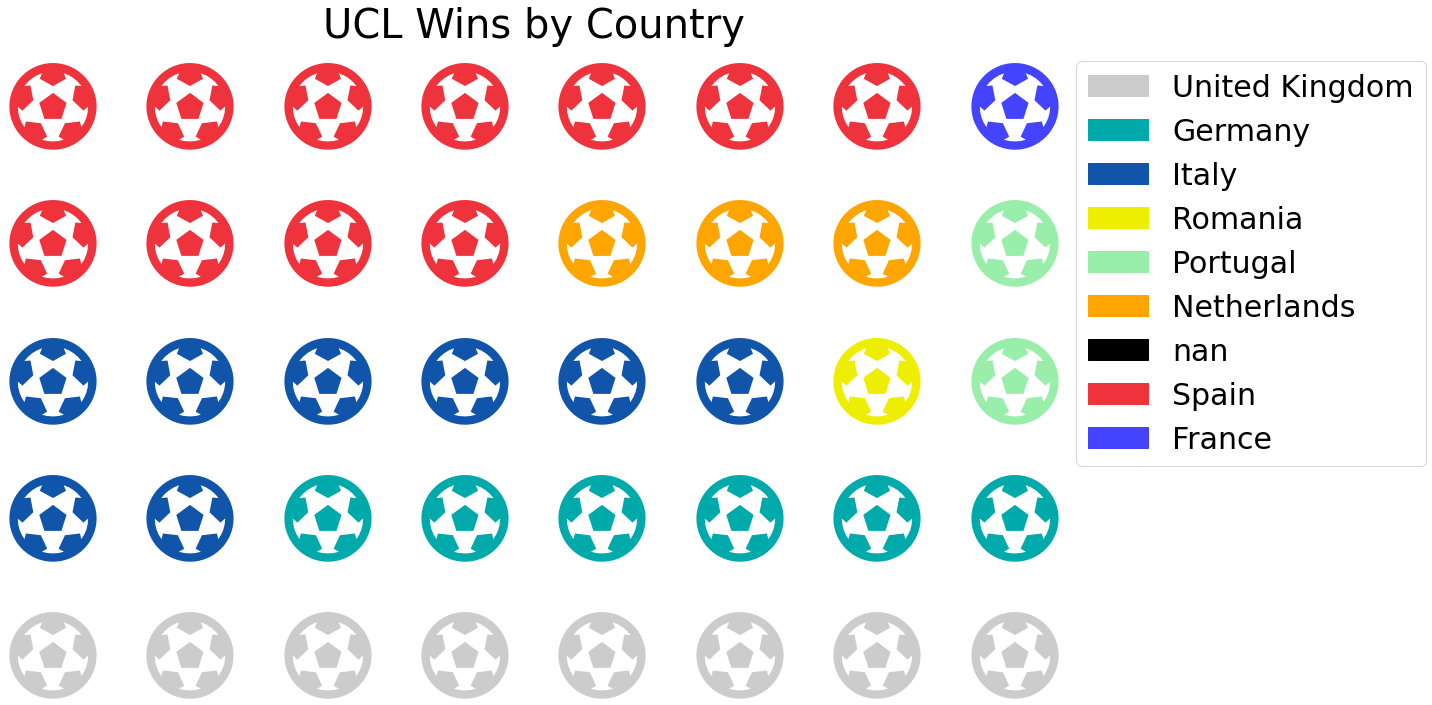

In [7]:
# To plot the waffle Chart
fig = plt.figure(
    title={
        'label': 'UCL Wins by Country',
        'loc': 'center',
        'fontdict': {
            'fontsize': 40
        }
    },
    figsize=(20,33),
    FigureClass = Waffle,
    rows = 5,
    colors=["#CCCCCC", "#00AAAA", "#1155AA", "#EEEE01", "#99EEAA", "#FFA500", "#000000", "#EE333D", "#4444FF"],
    values = df.wins,
    labels = list(df.countries),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'fontsize': 30},
    interval_ratio_x = 0.5,
    interval_ratio_y = 0.5,
    icons='futbol',
    icon_size = 90,
    vertical=True,
    block_aspect_ratio=1,
    block_arranging_style='snake'
)